# Банки — Анализ оттока клиентов

# Материалы 

https://disk.yandex.com/d/iK5_xTCwD3N3WA

Проанализируем клиентов регионального банка и выделим сегменты клиентов,
которые склонны уходить из банка. Банк «Метанпром» располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Описание датасета:

USERID — идентификатор пользователя,

score — баллы кредитного скоринга,

city — город,

gender — пол,

age — возраст,

equity — количество баллов собственности,

balance — баланс на счёте,

products — количество продуктов, которыми пользуется клиент,

credit_card — есть ли кредитная карта,

last_activity — активный клиент,

EST_SALARY — оценочный доход клиента,

сhurn — признак оттока.

**Ход работы над проектом:**

1. Загрузить данные и изучить общую информацию.


2. Выполнить предобработку данных:
- Проверка данных на дубликаты;
- проверка данных на пропуски;
- проверка стиля названия столбцов
- кодировка переменных.

3. Провести исследовательский анализ данных:

- Распределение признаков в разрезе оттока клиентов;
- сравнение портретов клиентов, которые склонны или нет к уходу;
- исследование данных на предмет наличия корреляций (построение матрицы корреляции);

4. Проверка гипотез:

- проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;

- проверить гипотезу, различие имеющихся продуктов у оставшихся и отточных клиентов.

5. Формирование сегментов:

- выделить клиентов по сегментам, посчитать кличество, распределение и выбрать наиболее подходящие.

6. Рекомендации:

- дать рекомендации по сегментам.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go 
import plotly.express as px 
from scipy import stats as st

In [2]:
data = pd.read_csv("C:\\Users\\Vlad\\Practicum\\bank_scrooge.csv")

In [3]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


По общей информации видно, что данные содержат 10000 строк и 12 столбцов, также нужно привести названия столбцов к нижнему регистру. Типы данных соответствующие.

## Предобработка данных

**Приведем названия столбцов к нужному стилю:**

In [5]:
data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

### Проверим на неявные дубликаты по user_id:

In [6]:
dubl = data[data.duplicated(['user_id'], keep=False)]
dubl

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


В данных оказались 73 пары дубликатов, так что можно оставить такое кол-во. Ниже посмотрим для примера, что представляет для себя дубликаты для клиента 175730

In [7]:
dubl[dubl['user_id'] == 175730]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7753,175730,846.0,Ярославль,Ж,32.0,7,216764.74,4,1,1,77100.85,1
9970,175730,816.0,Рыбинск,М,36.0,4,477892.07,3,1,0,81100.60,0


Дубликаты удалять не будем, так как это разные люди в разных городах банка.

### Проверим данные на пропуски:

In [8]:
data.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски обнаружены в столбцах "age" и "balance". Пропусков в столбце "balance" достаточно много, поэтому стоит проанализировать эти пропуски.

Попробуем найти зависимости или отсутствие зависимостей пропусков от данных, что далее решить, что с ними делать.

Создадим новый признак, принимающий 1, если пропущено значение признака, и 0, если значение признака не пропущено. Этот признак будем использовать как столбец (miss_balance) сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции.

In [9]:
data['miss_balance'] = np.where(data['balance'].isnull(), 1,0)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,1


Проверим зависимость по каждому столбцу:

In [10]:
data.groupby('miss_balance')['city'].value_counts(normalize=True).round(2)

miss_balance  city     
0             Ярославль    0.57
              Рыбинск      0.27
              Ростов       0.15
1             Ярославль    0.64
              Рыбинск      0.26
              Ростов       0.10
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance обслуживались:

64%  в Ярославле

26% в Рыбинске

10% в Ростове

In [11]:
data.groupby('miss_balance')['gender'].value_counts(normalize=True).round(2)

miss_balance  gender
0             Ж         0.52
              М         0.48
1             М         0.56
              Ж         0.44
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

56% мужчины

44% женщины

In [12]:
data.groupby('miss_balance')['equity'].value_counts(normalize=True).round(2)

miss_balance  equity
0             5         0.25
              4         0.24
              3         0.20
              2         0.14
              1         0.09
              0         0.05
              6         0.02
              7         0.01
              8         0.00
              9         0.00
1             0         0.95
              1         0.05
              3         0.00
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

95% баллов собственности не имеют

In [13]:
data.groupby('miss_balance')['products'].value_counts(normalize=True).round(2)

miss_balance  products
0             2           0.62
              1           0.18
              3           0.13
              4           0.06
              5           0.00
1             1           0.85
              2           0.14
              3           0.01
              0           0.00
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

85% имеют 1 продукт, которыми пользуются

Клиенты, у которых присутствуют значения balance:

62% имеют 2 продукта, которыми пользуются

In [14]:
data.groupby('miss_balance')['credit_card'].value_counts(normalize=True).round(2)

miss_balance  credit_card
0             1              0.64
              0              0.36
1             1              0.82
              0              0.18
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

82% имеют кредитную карту

18% не имеют кредитной карты

In [15]:
data.groupby('miss_balance')['last_activity'].value_counts(normalize=True).round(2)

miss_balance  last_activity
0             1                0.52
              0                0.48
1             1                0.55
              0                0.45
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

55% активные клиенты

45% не активные клиенты

Клиенты, у которых присутствуют значения balance:

52% активные клиенты

48% не активные клиенты

In [16]:
data.groupby('miss_balance')['churn'].value_counts(normalize=True).round(2)

miss_balance  churn
0             0        0.77
              1        0.23
1             0        0.99
              1        0.01
Name: proportion, dtype: float64

Клиенты, у которых отсутствуют значения balance:

99% остались в банке

1% ушли из банка

Клиенты, у которых присутствуют значения balance:

77% остались в банке

23% ушли из банка

После анализа пропусков их можно отнести к типу MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением. В наших данных явной зависимостью являются клиенты, у которых отсутствуют значения balance: 95% не имеют баллов собственности. Таким образом пропуски удалять нельзя, т.к. это приведёт к заметным искажениям.

### Посмотрим на средние значения данных:

In [17]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000,0.229500
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864,0.420532
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000


В данных можно наблюдать, что в столбце "products" есть нулевые значения. Расссмотрим более детально

In [18]:
data[data['products'] == 0]['user_id'].count()

1

Всего одна запись. Можно заменить нулевое значение на 1.

In [19]:
data.loc[data['products'] == 0, 'products'] = 1

### Кодирование переменных:

Закодируем столбцы gender и city, чтобы перевести категориальные переменные. Сначала сделаем их копии.

In [20]:
data['gender_2'] = data['gender']
data['city_2'] = data['city']

data = pd.get_dummies(data, columns = ['gender_2', 'city_2'])

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance,gender_2_Ж,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,True,False,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,True,False,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,True,False,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,True,False,False,False,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,False,True,False,False,True


Переименуем столбцы 

In [21]:
data = data.rename (
    columns = ({'gender_2_Ж':'female', 'gender_2_М':'male','city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск',
        'city_2_Ярославль':'Ярославль'}))
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance,female,male,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,True,False,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,True,False,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,True,False,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,True,False,False,False,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,False,True,False,False,True


**Вывод:
названия столбцов приведены в нужный стиль, проверили данные на дубликаты и пропуски, посмотрели средние значения и закодировали переменные.**

## Исследовательский анализ данных

### Распределение признаков среди всех клиентов и в разрезе оттока клиентов

**Для начала рассчитаем среднее значение оттока по банку:**

In [22]:
churn_mean = data['churn'].sum()/data['churn'].count()
churn_mean

0.182

**Разбивка по столбцу score относительно churn:**

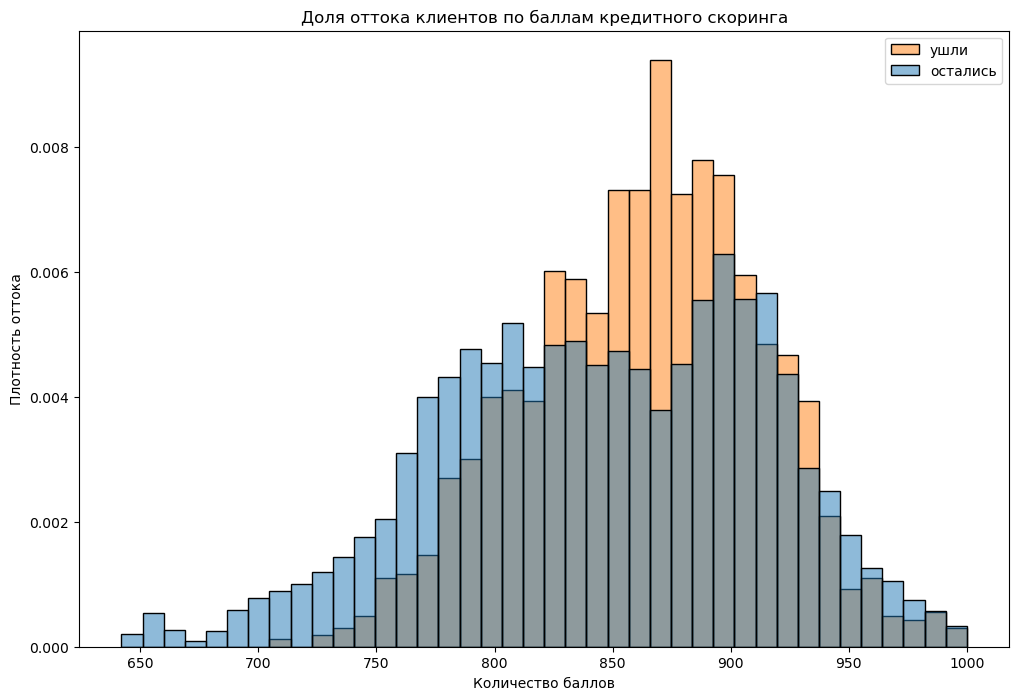

In [23]:
plt.figure(figsize=(12, 8))         
sns.histplot(data = data, x = 'score', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Доля оттока клиентов по баллам кредитного скоринга')
plt.xlabel('Количество баллов')
plt.ylabel('Плотность оттока')
plt.legend(['ушли', 'остались'])
plt.show();

По графику видно, что у клиентов, которые имеют баллы кредитного скоринга 830-910, отток выше.

**Разбивка по столбцу city относительно churn:**

In [24]:
churn_city = data.pivot_table(index = 'city', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_city.columns = churn_city.columns.droplevel(level = 1)
churn_city

,sum,mean,count
city,,,
Ростов,266,0.187721,1417
Рыбинск,437,0.162152,2695
Ярославль,1117,0.189708,5888


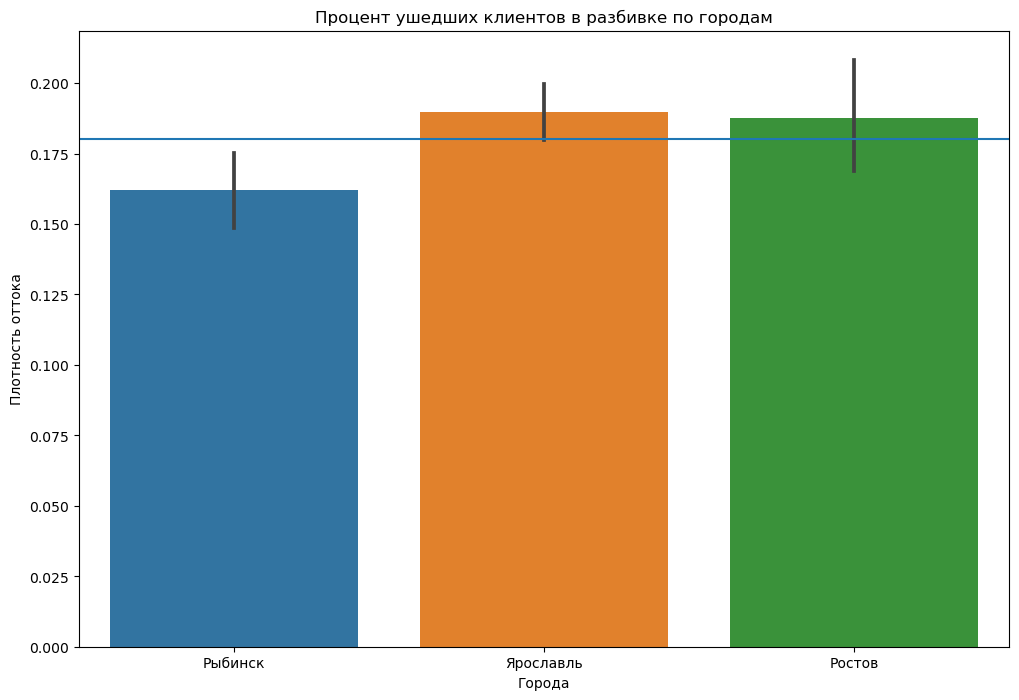

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'city', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по городам')
plt.xlabel('Города')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что отток клиентов выше в Ярославле и Ростове (причем выше среднего значения оттока по банку).

**Разбивка по столбцу gender относительно churn:**

In [26]:
churn_gender = data.pivot_table(index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
churn_gender.columns = churn_gender.columns.droplevel(level = 1)
churn_gender['percentage'] = churn_gender['sum']/churn_gender['count']*100
churn_gender

,sum,count,percentage
gender,,,
Ж,637,4995,12.752753
М,1183,5005,23.636364


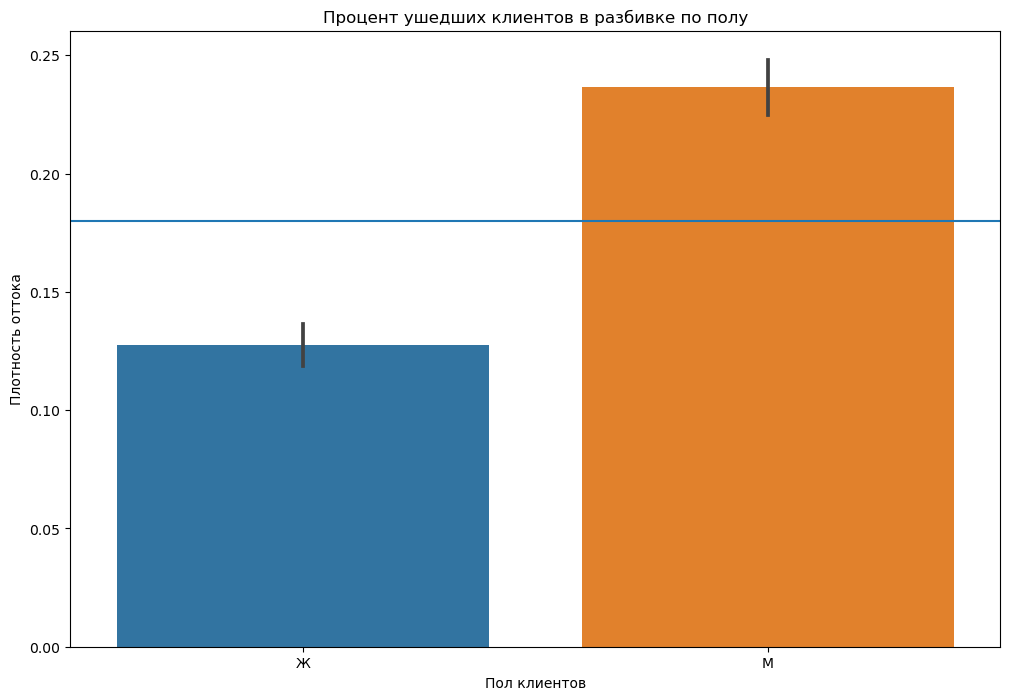

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'gender', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по полу')
plt.xlabel('Пол клиентов')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что процент ушедших клиентов мужского пола выше среднего значения оттока по банку и выше процента женского пола.

**Разбивка по столбцу age относительно churn:**

In [28]:
churn_age = data.pivot_table(index = 'age', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_age.columns = churn_age.columns.droplevel(level = 1)
churn_age

,sum,mean,count
age,,,
18.0,1,0.076923,13
19.0,1,0.062500,16
20.0,3,0.130435,23
21.0,4,0.266667,15
22.0,4,0.148148,27
...,...,...,...
81.0,0,0.000000,4
82.0,0,0.000000,2
83.0,0,0.000000,3


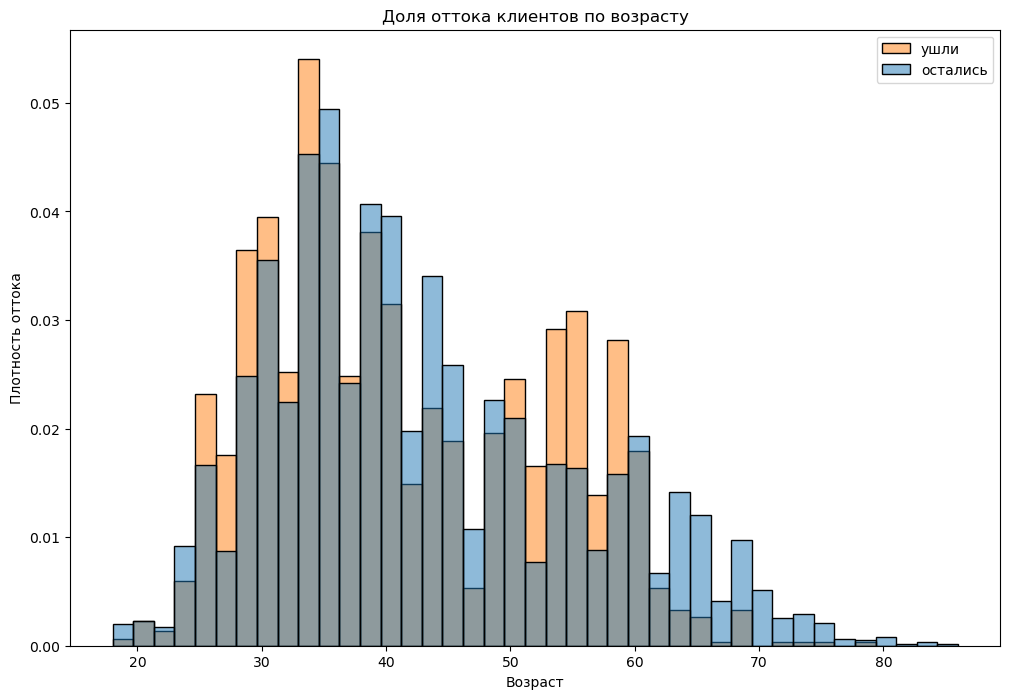

In [29]:
plt.figure(figsize=(12, 8))         
sns.histplot(data = data, x = 'age', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Доля оттока клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Плотность оттока')
plt.legend(['ушли', 'остались'])
plt.show();

По графику видно, что у клиентов, возраст которых 25-35 и 50-60, отток выше.

**Разбивка по столбцу equity относительно churn:**

In [30]:
churn_equity = data.pivot_table(index = 'equity', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_equity.columns = churn_equity.columns.droplevel(level = 1)
churn_equity

,sum,mean,count
equity,,,
0,90,0.034722,2592
1,93,0.120155,774
2,166,0.157795,1052
3,322,0.208684,1543
4,464,0.250811,1850
5,577,0.300834,1918
6,58,0.360248,161
7,37,0.462500,80
8,6,0.352941,17


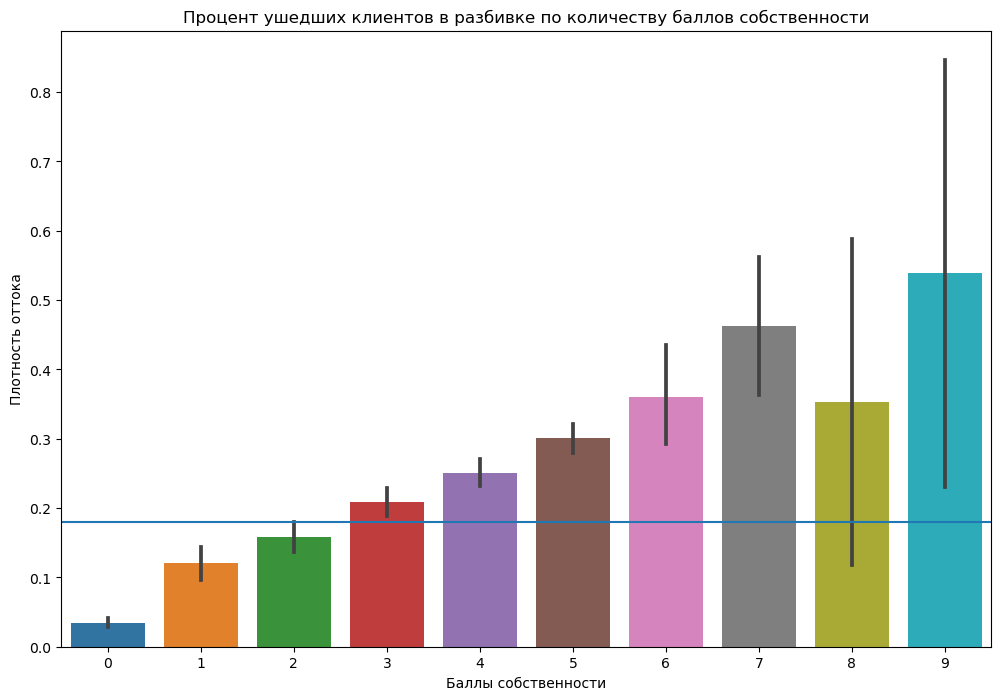

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'equity', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по количеству баллов собственности')
plt.xlabel('Баллы собственности')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что, чем больше баллов собственности (3 и выше), тем выше процент ухода клиентов.

**Разбивка по столбцу products относительно churn:**

In [32]:
churn_products = data.pivot_table(index = 'products', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_products.columns = churn_products.columns.droplevel(level = 1)
churn_products

,sum,mean,count
products,,,
1,236,0.070616,3342
2,979,0.190987,5126
3,297,0.285852,1039
4,300,0.632911,474
5,8,0.421053,19


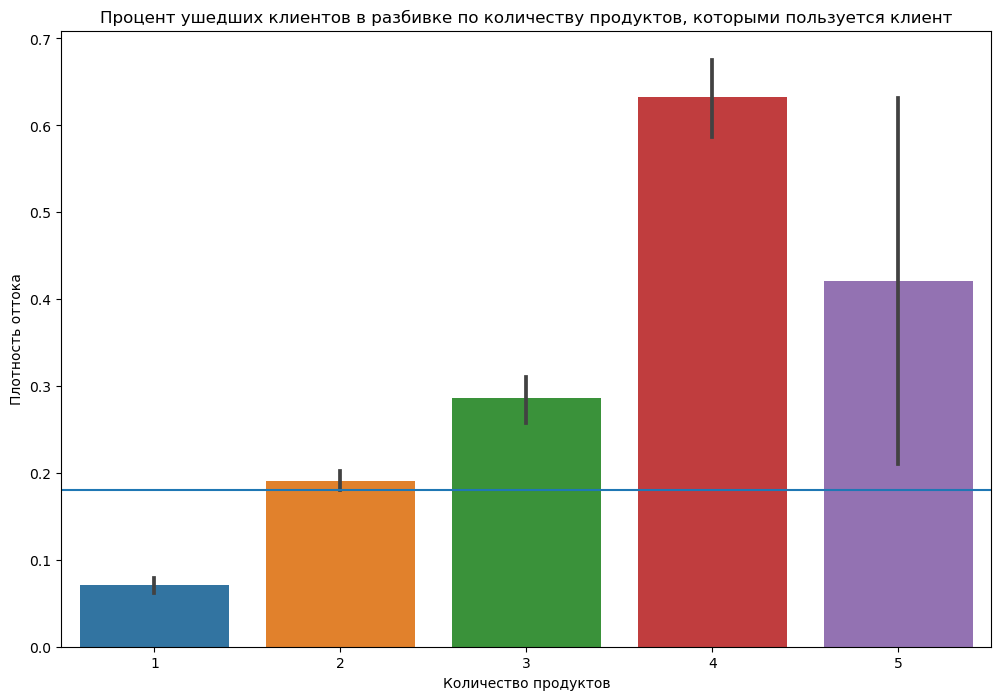

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'products', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по количеству продуктов, которыми пользуется клиент')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что клиенты, использующие 3 и более продуктов, уходят намного чаще остальных.

**Разбивка по столбцу credit_card относительно churn:**

In [34]:
data_1 = data.copy()
data_1['credit_card'] = np.where(data['credit_card'] == 0, 'no', 'yes')
data_1.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance,female,male,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,no,1,75719.14,1,0,True,False,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,yes,0,86621.77,0,0,True,False,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,yes,1,107683.34,0,1,True,False,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,no,1,174423.53,1,0,True,False,False,False,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,yes,0,67353.16,1,0,False,True,False,False,True


In [35]:
churn_credit_card = data_1.pivot_table(index = 'credit_card', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_credit_card.columns = churn_credit_card.columns.droplevel(level = 1)
churn_credit_card

,sum,mean,count
credit_card,,,
no,817,0.255632,3196
yes,1003,0.147413,6804


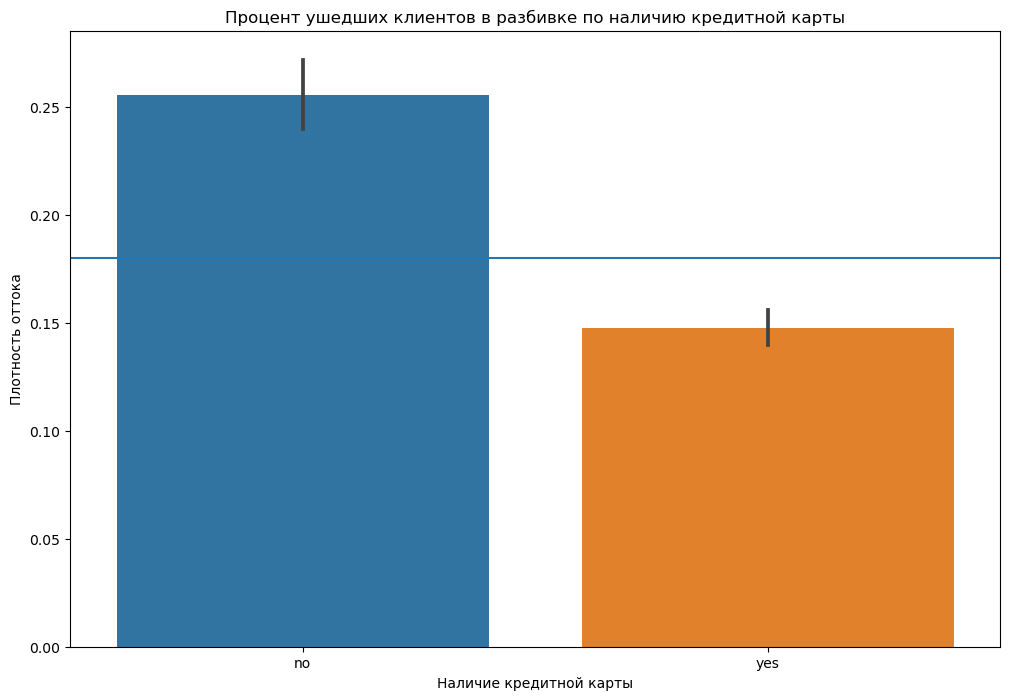

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data_1, x = 'credit_card', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что клиенты, у которых не было кредитной карты, уходят чаще, чем клиенты, у которых она была.

**Разбивка по столбцу last_activity относительно churn:**

In [37]:
data_2 = data.copy()
data_2['last_activity'] = np.where(data['last_activity'] == 0, 'no', 'yes')
data_2.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,miss_balance,female,male,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,yes,75719.14,1,0,True,False,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,no,86621.77,0,0,True,False,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,yes,107683.34,0,1,True,False,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,yes,174423.53,1,0,True,False,False,False,True
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,no,67353.16,1,0,False,True,False,False,True


In [38]:
churn_last_activity = data_2.pivot_table(index = 'last_activity', values = 'churn', aggfunc = ['sum', 'mean', 'count'])
churn_last_activity.columns = churn_last_activity.columns.droplevel(level = 1)
churn_last_activity

,sum,mean,count
last_activity,,,
no,542,0.113746,4765
yes,1278,0.244126,5235


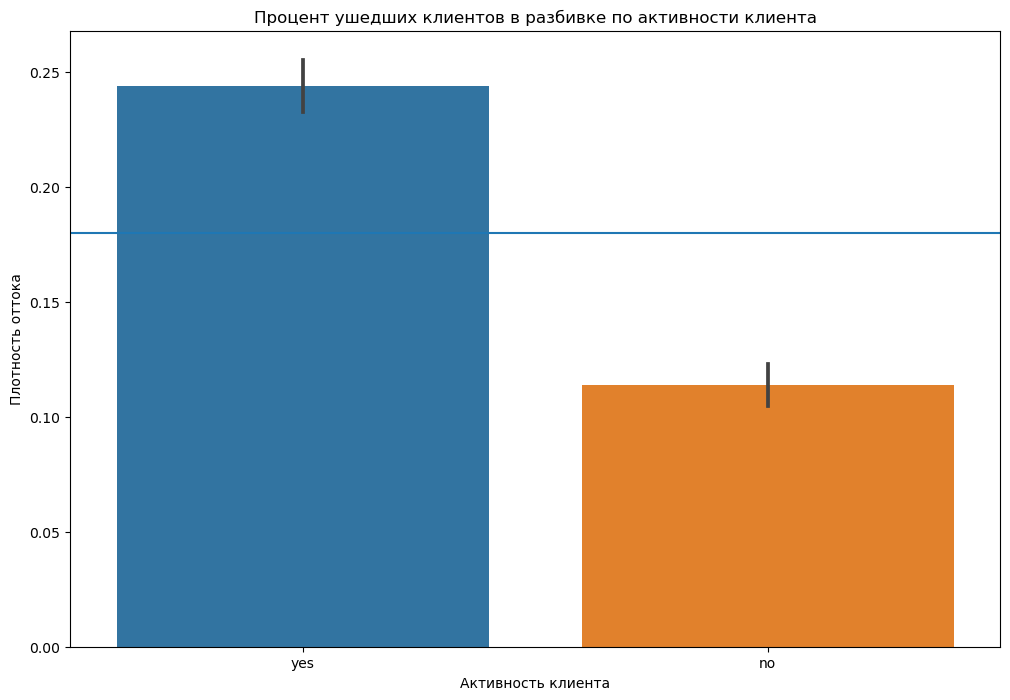

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data_2, x = 'last_activity', y = 'churn')
plt.title('Процент ушедших клиентов в разбивке по активности клиента')
plt.xlabel('Активность клиента')
plt.ylabel('Плотность оттока')
plt.axhline(y = 0.18);

По графику видно, что активные клиенты уходят из банка чаще, чем не активные. Возможно, это из-за того, что они получили негативный опыт пользования банковскими услугами.

**Разбивка по столбцу balance относительно churn:**

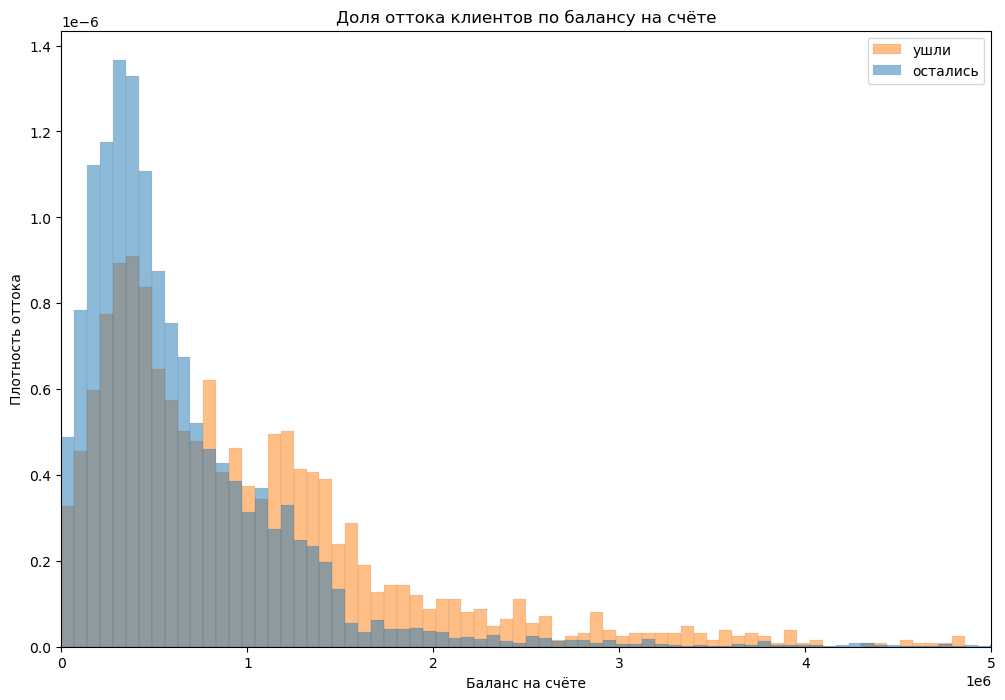

In [40]:
plt.figure(figsize=(12, 8))         
sns.histplot(data = data, x = 'balance', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Доля оттока клиентов по балансу на счёте')
plt.xlabel('Баланс на счёте')
plt.ylabel('Плотность оттока')
plt.xlim(0, 5000000)
plt.legend(['ушли', 'остались'])
plt.show();

По графику видно, что клиенты, у который баланс на счете 1-4 млн, уходят из банка чаще.

**Разбивка по столбцу est_salary относительно churn:**

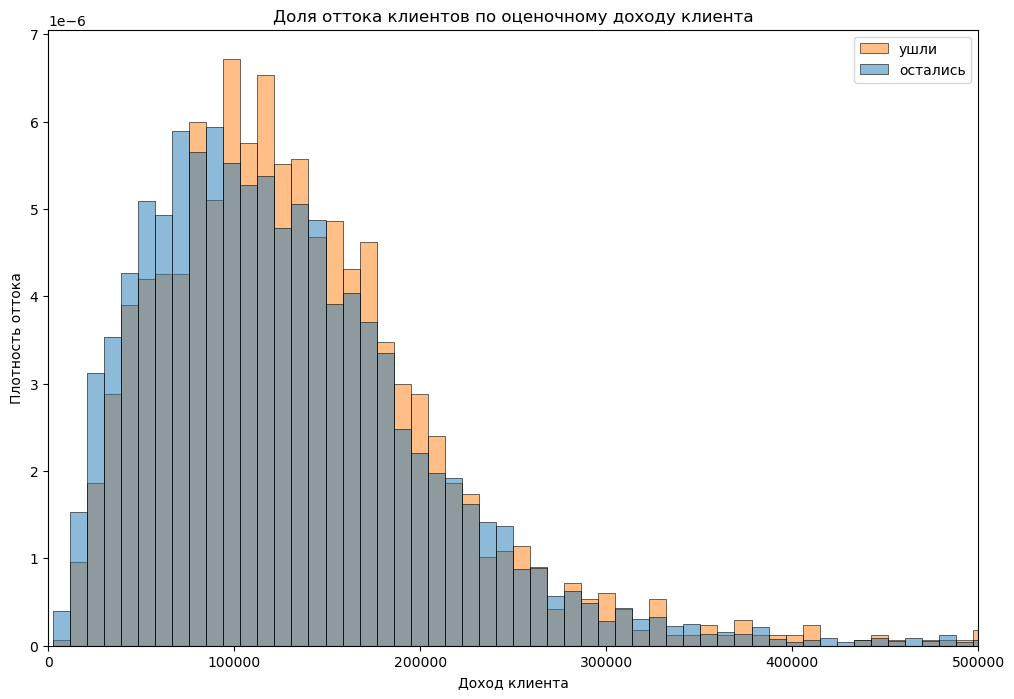

In [41]:
plt.figure(figsize=(12, 8))         
sns.histplot(data = data, x = 'est_salary', hue = 'churn', stat = 'density', common_norm = False)
plt.title('Доля оттока клиентов по оценочному доходу клиента')
plt.xlabel('Доход клиента')
plt.ylabel('Плотность оттока')
plt.xlim(0, 500000)
plt.legend(['ушли', 'остались'])
plt.show();

По графику видно, что клиенты, у который доход 100-200 тыс. рублей, уходят из банка чаще.

**Вывод:**

разбивка по столбцу score: у клиентов, которые имеют баллы кредитного скоринга 830-910, отток выше;

разбивка по столбцу city: по графику видно, что отток клиентов выше в Ярославле и Ростове (причем выше среднего значения оттока по банку);

разбивка по столбцу gender: по графику видно, что процент ушедших клиентов мужского пола выше среднего значения оттока по банку и выше процента женского пола;

разбивка по столбцу age: у клиентов, возраст которых 25-35 и 50-60, отток выше;

разбивка по столбцу equity: по графику видно, что, чем больше баллов собственности (3 и выше), тем выше процент ухода клиентов;

разбивка по столбцу products: по графику видно, что клиенты, использующие 3 и более продуктов, уходят намного чаще остальных;

разбивка по столбцу credit_card: по графику видно, что клиенты, у которых не было кредитной карты, уходят чаще, чем клиенты, у которых она была;

разбивка по столбцу last_activity: по графику видно, что активные клиенты уходят из банка чаще, чем не активные. Возможно, это из-за того, что они получили негативный опыт пользования банковскими услугами;

разбивка по столбцу balance: по графику видно, что клиенты, у который баланс на счете 1-4 млн, уходят из банка чаще;

разбивка по столбцу est_salary: по графику видно, что клиенты, у который доход 100-200 тыс. рублей, уходят из банка чаще.

**Построим матрицу корреляции**

In [42]:
df = data.copy()
df = df.drop(['user_id', 'miss_balance', 'city', 'gender'], axis = 1)

In [43]:
df

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,Ростов,Рыбинск,Ярославль
0,850.0,25.0,1,59214.82,2,0,1,75719.14,1,True,False,False,True,False
1,861.0,37.0,5,850594.33,3,1,0,86621.77,0,True,False,False,True,False
2,892.0,30.0,0,NaN,1,1,1,107683.34,0,True,False,False,True,False
3,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,True,False,False,False,True
4,730.0,34.0,5,174.00,1,1,0,67353.16,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,814.0,27.0,1,78144.65,1,0,1,18943.64,0,False,True,False,True,False
9996,894.0,46.0,0,NaN,1,1,0,196898.29,0,False,True,False,False,True
9997,903.0,24.0,0,NaN,2,1,1,108905.09,0,False,True,False,False,True
9998,777.0,68.0,3,865457.97,3,0,1,86874.90,0,True,False,False,False,True


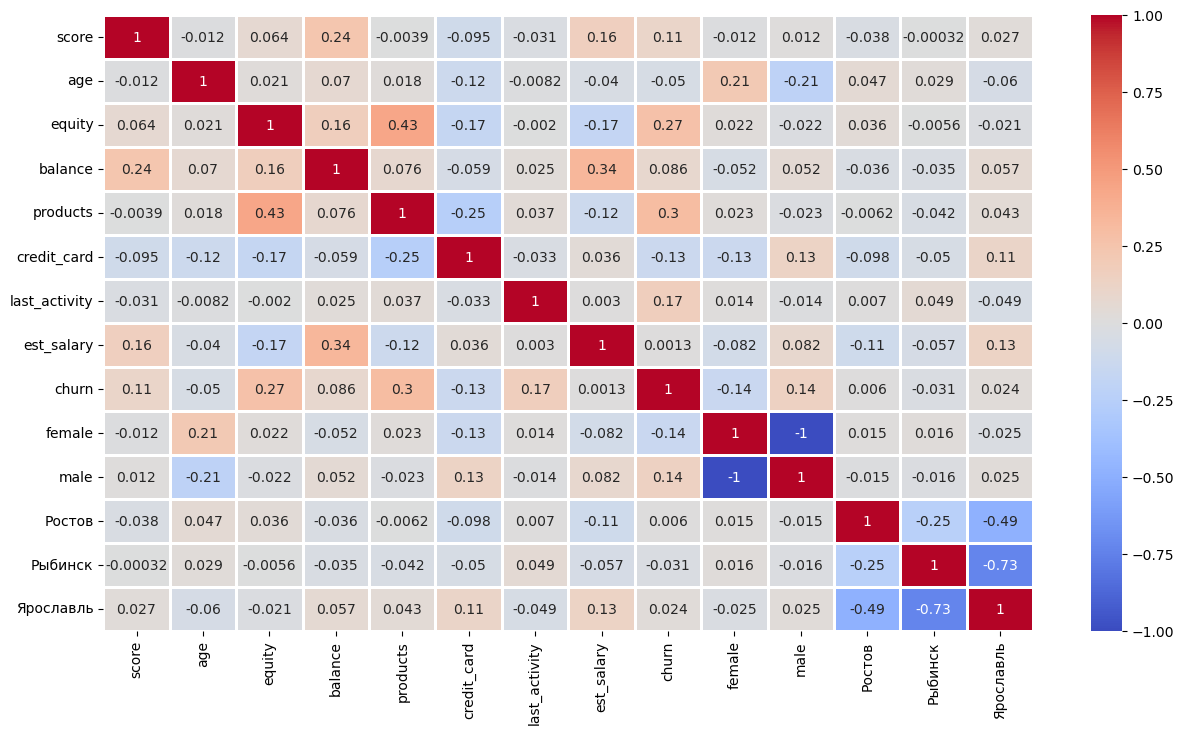

In [44]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', linewidths = 1);

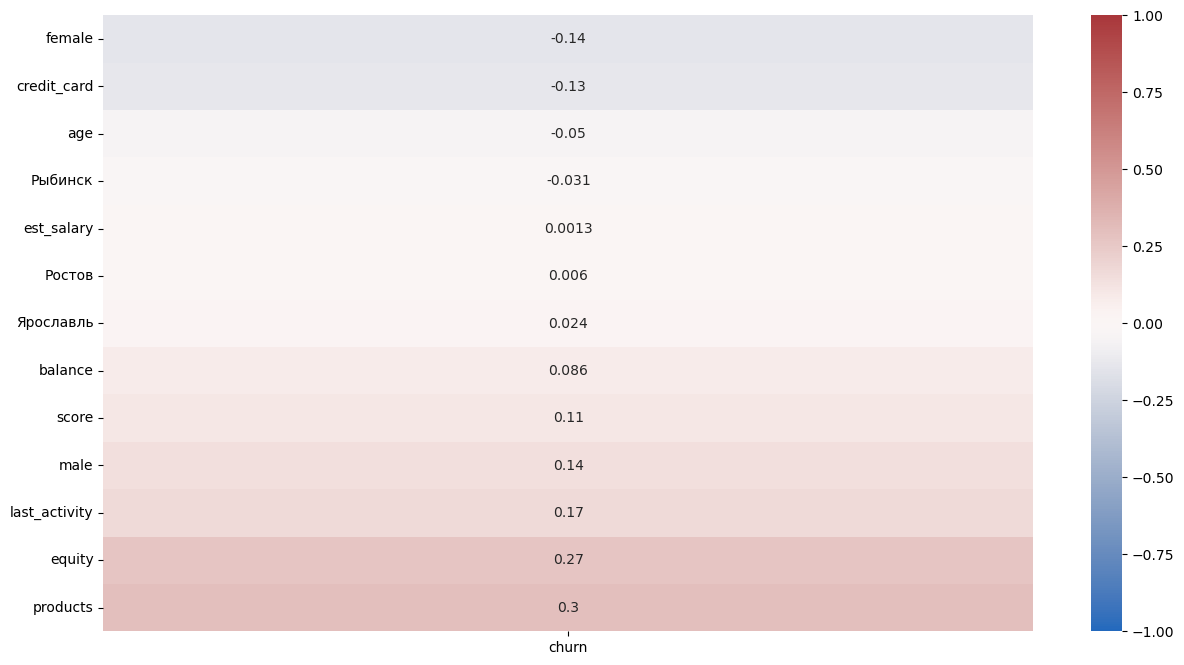

In [45]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr()[["churn"]].drop('churn').sort_values('churn'), vmin=-1, vmax=+1, annot=True, cmap="vlag", center = 0)
plt.show();

**Вывод:**

анализ корреляции показал, что наибольшая корреляция между показателем оттока клиентов и:

- equity (количество баллов собственности) 0.27;

- products (количество продуктов, которыми пользуется клиент) 0.3.

Также положительная слабая связь прослеживается:

- score (баллы кредитного скоринга): 0.11;

- last_activity (активность клиентов): 0.17;

- male: 0.14.

### Изучение портретов клиентов, склонных к уходу

Тендецнии, описывающие портреты клиентов, соберем в таблицу, и по каждому признаку между сегментами посчитаем относительную разницу:

In [46]:
data_portrait = data.pivot_table(columns = ['churn'],
                                 values = ['score', 'female', 'male', 'age', 'equity', 'balance', 'products',\
                                          'credit_card', 'last_activity', 'est_salary'],
                                 aggfunc = {'score' : 'mean', 'female': 'mean', 'male': 'mean','age': 'mean', 'equity': 'median',\
                                             'balance' : 'mean', 'products' : 'median', 'credit_card' : 'mean',\
                                             'last_activity' : 'median', 'est_salary' : ['mean', 'median']}).reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)


data_portrait

churn,level_0,level_1,0,1
0,age,mean,43.02,41.45
1,balance,mean,733982.59,1133993.27
2,credit_card,mean,0.71,0.55
3,equity,median,3.00,4.00
4,est_salary,mean,147783.20,148243.01
5,est_salary,median,118257.71,125390.62
6,female,mean,0.53,0.35
7,last_activity,median,0.00,1.00
8,male,mean,0.47,0.65
9,products,median,2.00,2.00


In [47]:
data_portrait = data_portrait.rename(columns = {'level_0':'Признаки', 'level_1':'Значения', 0:'Не отточные', 1:'Отточные'})

data_portrait

churn,Признаки,Значения,Не отточные,Отточные
0,age,mean,43.02,41.45
1,balance,mean,733982.59,1133993.27
2,credit_card,mean,0.71,0.55
3,equity,median,3.00,4.00
4,est_salary,mean,147783.20,148243.01
5,est_salary,median,118257.71,125390.62
6,female,mean,0.53,0.35
7,last_activity,median,0.00,1.00
8,male,mean,0.47,0.65
9,products,median,2.00,2.00


In [48]:
data_portrait['Относительная разница'] = ((data_portrait['Не отточные'] - data_portrait['Отточные']) / data_portrait['Не отточные'])
data_portrait

churn,Признаки,Значения,Не отточные,Отточные,Относительная разница
0,age,mean,43.02,41.45,0.04
1,balance,mean,733982.59,1133993.27,-0.54
2,credit_card,mean,0.71,0.55,0.22
3,equity,median,3.00,4.00,-0.33
4,est_salary,mean,147783.20,148243.01,-0.00
5,est_salary,median,118257.71,125390.62,-0.06
6,female,mean,0.53,0.35,0.34
7,last_activity,median,0.00,1.00,-inf
8,male,mean,0.47,0.65,-0.39
9,products,median,2.00,2.00,0.00


Можно выделить характеристики, у которых сильная относительная разница: balance, credit_card, equity, male, female.  

Портрет клиента:

средний возраст - 41 год, баланс на счете > 1 млн. руб.,  по гендерной принадлежности - мужчины, баллы кредитного скоринга 830-910, не имеют кредитную карту, относятся к активным клиентам, баллов собственности большее 3, средняя зарплата - 125390 руб., используют 3 и более продуктов.

**Вывод: 
изучили распределение признаков в разрезе оттока клиентов, построили матрицу корреляции, составли портреты клиентов, склонных к уходу.**

## Проверка гипотез

### Гипотеза №1: различие доходов оставшихся и отточных клиентов
H₀: доходы оставшихся и ушедших клиентов равны

H₁: доходы оставшихся и ушедших клиентов не равны

**Чтобы понять, можно ли применять t-тест, нужно проверить три условия:**

- Генеральные совокупности не зависят друг от друга

- Выборочные средние нормально распределены

- Дисперсии рассматриваемых генеральных совокупностей равны

Мы не рассматриваем генеральную совокупность до и после какого-либо изменения и, даже если дисперсии на самом деле не равны, то тест редко ошибается. Поэтому проверим распределение выборочных средних:

In [49]:
churn_1 = data[data['churn'] == 1]['est_salary']
churn_0 = data[data['churn'] == 0]['est_salary']

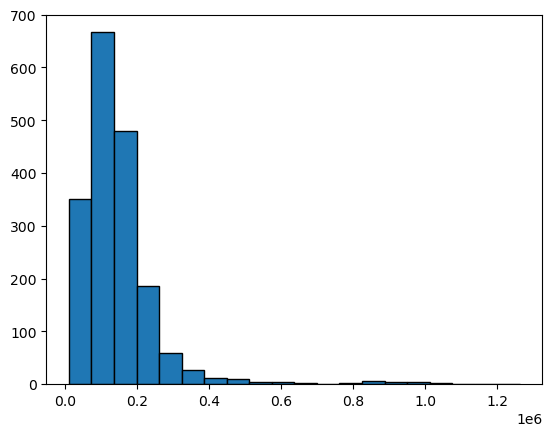

In [50]:
plt.hist (churn_1, edgecolor='black', bins=20);

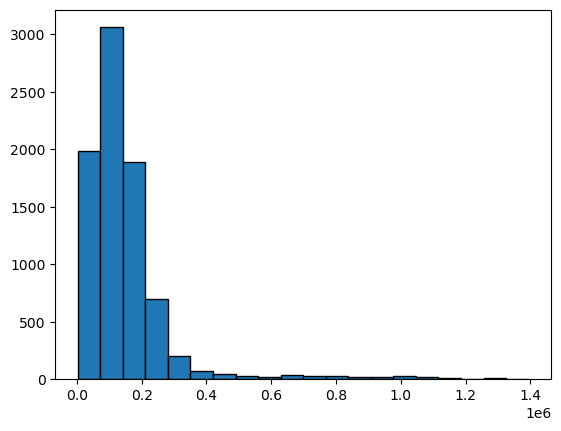

In [51]:
plt.hist (churn_0, edgecolor='black', bins=20);

По графику видно, что набор данных не имеет «колокольчатой формы» и не имеет нормального распределения

In [52]:
churn_1 = data[data['churn'] == 1]['est_salary']
churn_0 = data[data['churn'] == 0]['est_salary']

results = st.ttest_ind(churn_1, churn_0, equal_var = False)

alpha = 0.05

print(results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


**Проведем u-тест:**

In [53]:
alpha = 0.05  

results = st.mannwhitneyu(churn_1, churn_0)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.000243559272811695
Отвергаем нулевую гипотезу


Тест показал, что отвергаем нулевую гипотезу , т.е. доходы оставшихся и ушедших клиентов не равны.

### Гипотеза №2: различие имеющихся продуктов у оставшихся и отточных клиентов

H₀: кол-во продуктов оставшихся и ушедших клиентов равны

H₁: кол-во продуктов оставшихся и ушедших клиентов не равны

**Чтобы понять, можно ли применять t-тест, нужно проверить три условия:**

- Генеральные совокупности не зависят друг от друга

- Выборочные средние нормально распределены

- Дисперсии рассматриваемых генеральных совокупностей равны

Мы не рассматриваем генеральную совокупность до и после какого-либо изменения и, даже если дисперсии на самом деле не равны, то тест редко ошибается. Поэтому проверим распределение выборочных средних:

In [54]:
products_1 = data[data['churn'] == 1]['products']
products_0 = data[data['churn'] == 0]['products']

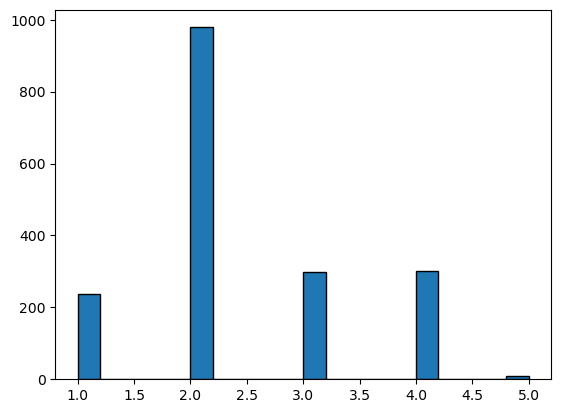

In [55]:
plt.hist (products_1, edgecolor='black', bins=20);

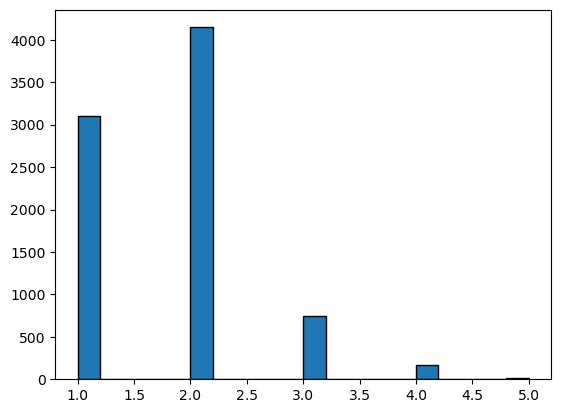

In [56]:
plt.hist (products_0, edgecolor='black', bins=20);

Гистограммы не имеют вид нормального распределения. Будем использовать U-тест.

In [57]:
alpha = 0.05  

results = st.mannwhitneyu(products_1, products_0)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  4.3792410512214974e-162
Отвергаем нулевую гипотезу


Тест показал, что отвергаем нулевую гипотезу, т.е. кол-во продуктов оставшихся и ушедших клиентов не равны

**Вывод: проверили 2 гипотезы, результаты которых показал, что в обоих случаях отверграем нулевую гипотезу**

## Формирование сегментов

1 сегмент:

количество баллов собственности больше 3
    
активный клиент

Доля оттока 39

In [58]:
data.query('equity > 3 and last_activity == 1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.39
sum,845.00
count,2142.00


2 сегмент:

мужчины

баланс больше 1 млн

Доля оттока 49

In [59]:
data.query('gender == "М" and balance > 1000000').agg({"churn":["mean","sum","count"]})

,churn
mean,0.49
sum,477.00
count,976.00


3 сегмент:

баллы кредитного скоринга 830-910

количество продуктов, которыми пользуется клиент больше или равно 3

Доля оттока 44

In [60]:
data.query('830 <= score <= 910 and products >= 3').agg({"churn":["mean","sum","count"]})

,churn
mean,0.44
sum,305.00
count,697.00


## Вывод

**Загрузили данные и изучили общую информацию**


**Выполнили предобработку данных:**
- проверили данных на дубликаты, пропуски;
- проверили стиль названия столбцов;
- провели кодировку переменных.

**Выполнили исследовательский анализ данных:**
- выполнили распределение признаков в разрезе оттока клиентов:

разбивка по столбцу score: у клиентов, которые имеют баллы кредитного скоринга 830-910, отток выше;

разбивка по столбцу city: по графику видно, что отток клиентов выше в Ярославле и Ростове (причем выше среднего значения оттока по банку);

разбивка по столбцу gender: по графику видно, что процент ушедших клиентов мужского пола выше среднего значения оттока по банку и выше процента женского пола;

разбивка по столбцу age: у клиентов, возраст которых 25-35 и 50-60, отток выше;

разбивка по столбцу equity: по графику видно, что, чем больше баллов собственности (3 и выше), тем выше процент ухода клиентов;

разбивка по столбцу products: по графику видно, что клиенты, использующие 3 и более продуктов, уходят намного чаще остальных;

разбивка по столбцу credit_card: по графику видно, что клиенты, у которых не было кредитной карты, уходят чаще, чем клиенты, у которых она была;

разбивка по столбцу last_activity: по графику видно, что активные клиенты уходят из банка чаще, чем не активные. Возможно, это из-за того, что они получили негативный опыт пользования банковскими услугами;

разбивка по столбцу balance: по графику видно, что клиенты, у который баланс на счете 1-4 млн, уходят из банка чаще;

разбивка по столбцу est_salary: по графику видно, что клиенты, у который доход 100-200 тыс. рублей, уходят из банка чаще.

- сравнили портреты клиентов, которые склонны или нет к уходу (Можно выделить характеристики, у которых сильная относительная разница: balance, credit_card, equity, male, female.  

Портрет клиента:

средний возраст - 41 год, баланс на счете > 1 млн. руб.,  по гендерной принадлежности - мужчины, баллы кредитного скоринга 830-910, не имеют кредитную карту, относятся к активным клиентам, баллов собственности большее 3, средняя зарплата - 125390 руб., используют 3 и более продуктов.)

- исследовали данные на предмет наличия корреляций (построение матрицы корреляции);

**Проверка гепотез**
 
- проверили гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;

- проверили гипотезу, различие имеющихся продуктов у оставшихся и отточных клиентов.

**Формирование сегментов:**

- выделили клиентов по сегментам, посчитали кличество, распределение и выбрали наиболее подходящие.

1 сегмент:

количество баллов собственности больше 3
    
активный клиент

Доля оттока 39

2 сегмент:

мужчины

баланс больше 1 млн

Доля оттока 49

3 сегмент:

баллы кредитного скоринга 830-910

количество продуктов, которыми пользуется клиент больше или равно 3

Доля оттока 44

**Рекомендации**

Рекомендации по 1 сегменту:

предложить специальные условия страхования

Рекомендации по 2 сегменту:

Предложить повышенный % для вкладов

Рекомендации по 3 сегменту:

предложить кэшбеки по используемой продукции